<a href="https://colab.research.google.com/github/yy3743/NYU_Integrated_Marketing/blob/main/yy3743_(World's_Happiness_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yy3743/NYU_Integrated_Marketing/main/2019.csv')
df=df.dropna()
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls'], method='pearson').round(3)

ValueError: ignored

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls','account_length'], method='pearson').round(3)

### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='total_day_calls'
y='number_customer_service_calls'
control='account_length'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

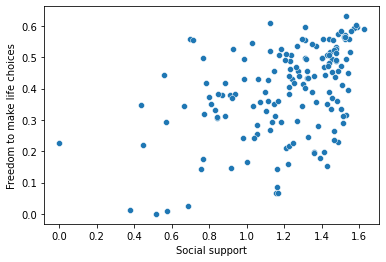

In [ ]:
x='Social support'
y='Freedom to make life choices'
sns.scatterplot(data=df, x=x, y=y)

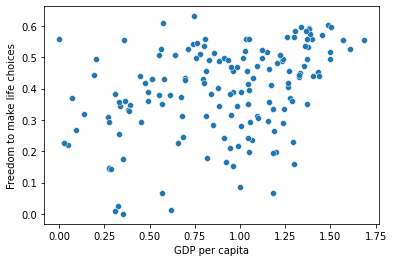

In [ ]:
x='GDP per capita'
y='Freedom to make life choices'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.2+ KB


In [ ]:
# define the dependent and independent variables
X=df[['Social support','GDP per capita']]
y=df['Freedom to make life choices']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,Social support,GDP per capita
0,1.0,1.587,1.340
1,1.0,1.573,1.383
2,1.0,1.582,1.488
3,1.0,1.624,1.380
4,1.0,1.522,1.396


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Freedom to make life choices   R-squared (uncentered):                   0.901
Model:                                      OLS   Adj. R-squared (uncentered):              0.899
Method:                           Least Squares   F-statistic:                              697.8
Date:                          Thu, 10 Dec 2020   Prob (F-statistic):                    6.17e-78
Time:                                  10:16:10   Log-Likelihood:                          94.906
No. Observations:                           156   AIC:                                     -185.8
Df Residuals:                               154   BIC:                                     -179.7
Df Model:                                     2                                                  
Covariance Type:                      nonrobust                                                  
                    

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,0.090724,0.505276
1,0.091203,0.500797
2,0.099375,0.503625
3,0.073947,0.517053
4,0.072462,0.484538


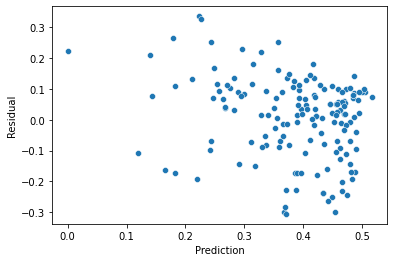

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

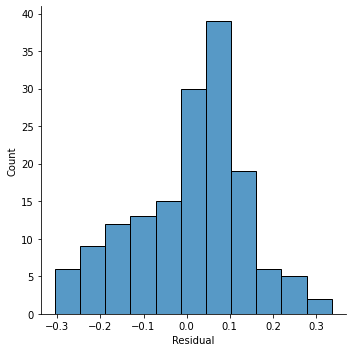

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.970997,0.002259,False


In [ ]:
pg.pairwise_corr(df,columns=['social support','GDP per capita'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,GDP per capita,Overall rank,pearson,two-sided,156,-0.802,"[-0.85, -0.74]",0.643,0.638,-1.104,0.000,1.04e+33,1.000
1,GDP per capita,Score,pearson,two-sided,156,0.794,"[0.73, 0.85]",0.630,0.625,1.082,0.000,7.042e+31,1.000
2,GDP per capita,Social support,pearson,two-sided,156,0.755,"[0.68, 0.82]",0.570,0.564,0.984,0.000,7.167e+26,1.000
3,GDP per capita,Healthy life expectancy,pearson,two-sided,156,0.835,"[0.78, 0.88]",0.698,0.694,1.206,0.000,3.379e+38,1.000
4,GDP per capita,Freedom to make life choices,pearson,two-sided,156,0.379,"[0.24, 0.51]",0.144,0.133,0.399,0.000,1.328e+04,0.999
5,GDP per capita,Generosity,pearson,two-sided,156,-0.080,"[-0.23, 0.08]",0.006,-0.007,-0.080,0.323,0.163,0.168
6,GDP per capita,Perceptions of corruption,pearson,two-sided,156,0.299,"[0.15, 0.44]",0.089,0.077,0.308,0.000,123.398,0.969


#Logit Analysis

In [ ]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()